### Approach with intact flow data

#### EOS evaluation according to `ISO 5840-1:2021`
#### 2/1/2023

In [55]:
# For data processing and analysis
import pandas as pd
import numpy as np

# For directory management
import os

# For plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

$$
\Delta P_{mean} = \dfrac{1}{T_{systole}} \int_{T_{systole}} (P_{vent} - P_{aortic}) dt,
$$
where $P_{vent}$ and $P_{aortic}$ are the ventricular and aortic pressures, respectively. The mean pressure difference is calculated by integrating the pressure difference over the duration of systole.

$T_{systole}$ is the duration of systole

$$
T_{systole} = t_2 - t_1,
$$
where $t_1$ is the time at the start of the positive differential pressure period (time period between start of positive differential pressure and end of positive differential pressure)

<img src="./images/main_plot.svg" title="Main characteristics" width="600"/>

In [56]:
# Importing the dataset from .xlsx file
path = "./data/testadata_W.xlsx"
df = pd.read_excel(path)
df

,Step number,Time,TimeStep,"VolumeflowInlet, m^3/s","VolumeflowOutlet, m^3/s","PressureInlet, Pa","PressureOutlet, Pa"
0,1,1.000000e-08,1.000000e-08,-1.914590e-17,2.037020e-17,1133.240,1133.24
1,2,2.000000e-08,1.000000e-08,1.555080e-14,-2.623500e-16,1133.240,1133.24
2,3,3.000000e-08,1.000000e-08,7.738420e-14,-8.126770e-16,1133.240,1133.24
3,4,4.000000e-08,1.000000e-08,1.440140e-13,-1.585740e-15,1133.240,1133.24
4,5,5.000000e-08,1.000000e-08,2.088000e-13,-2.546870e-15,1133.240,1133.24
...,...,...,...,...,...,...,...
7275,7276,6.876290e-01,1.000000e-04,5.830580e-07,5.536560e-05,-745.734,1390.68
7276,7277,6.877290e-01,1.000000e-04,5.774790e-07,5.528490e-05,-745.735,1390.68
7277,7278,6.878290e-01,1.000000e-04,5.692560e-07,5.520100e-05,-745.734,1390.68
7278,7279,6.879290e-01,1.000000e-04,5.595340e-07,5.511280e-05,-745.734,1390.68


In [57]:
# Drop Step number column
df = df.drop(['Step number'], axis=1)

In [58]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     7280 non-null   float64
 1   TimeStep                 7280 non-null   float64
 2   VolumeflowInlet, m^3/s   7280 non-null   float64
 3   VolumeflowOutlet, m^3/s  7280 non-null   float64
 4   PressureInlet, Pa        7280 non-null   float64
 5   PressureOutlet, Pa       7280 non-null   float64
dtypes: float64(6)
memory usage: 341.4 KB


In [59]:
# Make all column names lower case
df.columns = map(str.lower, df.columns)

In [60]:
# Rename columns
df = df.rename(columns={'volumeflowinlet, m^3/s': "v_in", "volumeflowoutlet, m^3/s": "v_out",\
    "pressureinlet, pa": 'p_vent', "pressureoutlet, pa": 'p_aort'})

In [61]:
df.head()

,time,timestep,v_in,v_out,p_vent,p_aort
0,1.000000e-08,1.000000e-08,-1.914590e-17,2.037020e-17,1133.24,1133.24
1,2.000000e-08,1.000000e-08,1.555080e-14,-2.623500e-16,1133.24,1133.24
2,3.000000e-08,1.000000e-08,7.738420e-14,-8.126770e-16,1133.24,1133.24
3,4.000000e-08,1.000000e-08,1.440140e-13,-1.585740e-15,1133.24,1133.24
4,5.000000e-08,1.000000e-08,2.088000e-13,-2.546870e-15,1133.24,1133.24


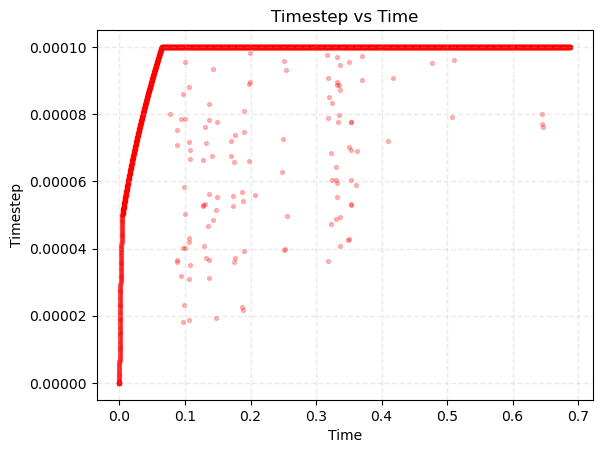

In [62]:
# histogramm timestep vs time
plt.scatter(df['time'], df['timestep'], s=8, c='red', marker='o', alpha=0.25)
plt.xlabel('Time')
plt.ylabel('Timestep')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.25)
plt.title('Timestep vs Time')
plt.show()

In [63]:
# Calculate the difference between p_vent and p_aort
# and flow, which is the difference between v_in and v_out.
df['pv-pa'] = df['p_vent']-df['p_aort']
df['flow'] = df['v_in'] - df['v_out']
df.sample(5)

,time,timestep,v_in,v_out,p_vent,p_aort,pv-pa,flow
4358,0.396063,0.000100,0.000030,-0.000082,-813.253,1573.55,-2386.803,0.000111
1829,0.145509,0.000100,0.000389,0.000425,4141.930,2628.79,1513.140,-0.000035
731,0.039821,0.000083,0.000144,0.000046,3690.780,1723.96,1966.820,0.000098
4948,0.455026,0.000100,0.000015,0.000042,-791.121,1481.31,-2272.431,-0.000027
901,0.054861,0.000094,0.000208,0.000150,4229.730,2043.41,2186.320,0.000058


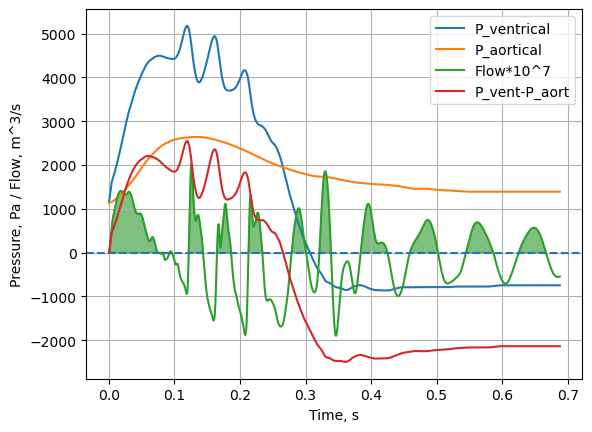

In [64]:
# Plot p_in vs p_out. Use time as x-axis.
plt.plot(df['time'], df['p_vent'], label='P_ventrical')
plt.plot(df['time'], df['p_aort'], label='P_aortical')
plt.plot(df["time"], (df['flow'])*10**7, label="Flow*10^7")
# Plot horizontal line at 0.
plt.axhline(y=0, linestyle='--')
# Fill the area where flow is positive.
plt.fill_between(df["time"], (df['flow'])*10**7, where=(df['flow'])*10**7 > 0, color='green', alpha=0.5)
plt.plot(df["time"], (df['pv-pa']), label="P_vent-P_aort")
plt.xlabel('Time, s')
plt.ylabel('Pressure, Pa / Flow, m^3/s')
plt.grid()
plt.legend()
plt.savefig('test.svg')
plt.show()

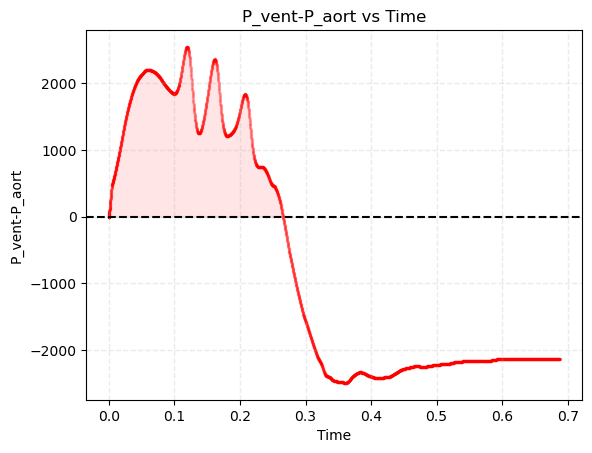

In [65]:
# Scatter plot of p_v-p_a vs time
plt.scatter(df['time'], df['pv-pa'], s=2, c='red', marker='o', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('P_vent-P_aort')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.25)
# Plot horizontal line at 0.
plt.axhline(y=0, linestyle='--', color='black')
# Fill the area where df['pv-pa']>0.
plt.fill_between(df["time"], df['pv-pa'], where=df['pv-pa'] > 0, color='r', alpha=0.1)
plt.title('P_vent-P_aort vs Time')
plt.show()

In [66]:
# Interactive plot. Optional.
# fig = px.scatter(df, x="time", y="pv-pa", color="pv-pa", hover_data=['pv-pa'])
# fig.show()

In [67]:
x_data = df['time']
y_data = df['pv-pa']

# Interpolate data with a cubic spline
from scipy.interpolate import interp1d
f = interp1d(x_data, y_data, kind='cubic')

In [68]:
# Find the roots of the interpolated function
from scipy.optimize import fsolve
roots = fsolve(f, 0.3)

In [69]:
# Plot the interpolated function and the roots. Use plotly.
# Interactive plot. Optional.


# import plotly.graph_objects as go
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='markers', name='Data'))
# fig.add_trace(go.Scatter(x=x_data, y=f(x_data), mode='lines', name='Interpolation'))
# fig.add_trace(go.Scatter(x=roots, y=f(roots), mode='markers', name='Roots'))
# # Name the axes
# fig.update_layout(xaxis_title='Time', yaxis_title='P_vent-P_aort')
# # Show the plot
# fig.show()

In [70]:
# Print the roots coordinates
print('Roots coordinates:')
for i in range(len(roots)):
    print('time =', roots[i], 'y =', f(roots[i]))
t2 = roots[0]

Roots coordinates:
time = 0.2655005527057951 y = 8.497480497027254e-11


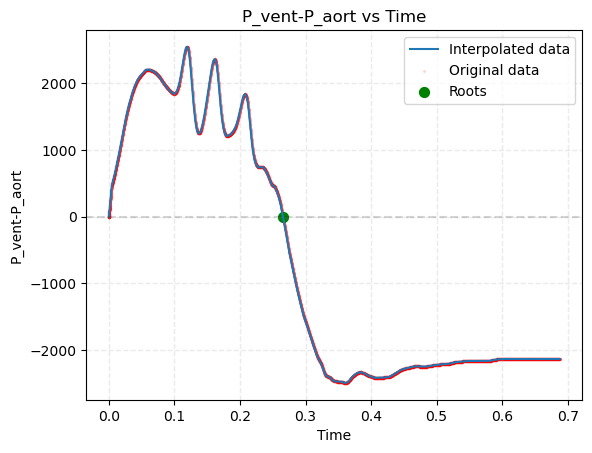

In [71]:
# Plot the interpolated data with plot and scatter original data.
x_new = np.linspace(x_data.min(), x_data.max(), 1000)
plt.plot(x_new, f(x_new), label='Interpolated data')
plt.scatter(x_data, y_data, s=2, c='red', marker='o', alpha=0.1, label='Original data')
plt.xlabel('Time')
plt.ylabel('P_vent-P_aort')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.25)
# Plot horizontal line at 0.
plt.axhline(y=0, linestyle='--', color='black', alpha=0.16)
# Plot roots
plt.scatter(roots, f(roots), s=50, c='green', marker='o', alpha=1, label='Roots')
plt.title('P_vent-P_aort vs Time')
plt.legend()
plt.show()

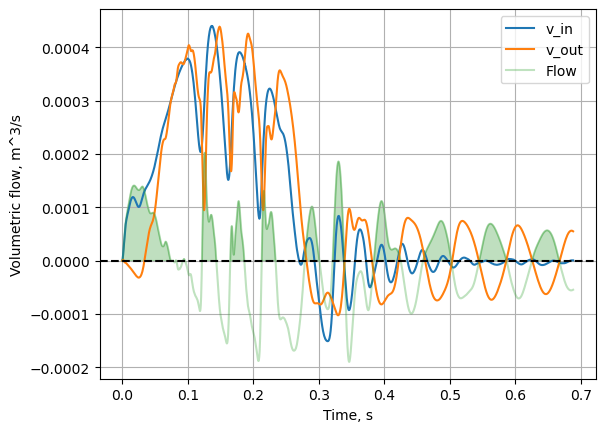

In [72]:
# Plot v_in vs v_out. Use time as x-axis.
plt.plot(df['time'], df['v_in'], label='v_in')
plt.plot(df['time'], df['v_out'], label='v_out')
plt.plot(df["time"], (df["v_in"]-df['v_out']), label="Flow", alpha=0.3)
# Fill the area where flow is positive.
plt.fill_between(df["time"], (df["v_in"]-df['v_out']), where=(df["v_in"]-df['v_out']) > 0, color='green', alpha=0.25)
# Plot horizontal line at 0.
plt.axhline(y=0, color='k', linestyle='--')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Volumetric flow, m^3/s')
plt.legend()
plt.show()

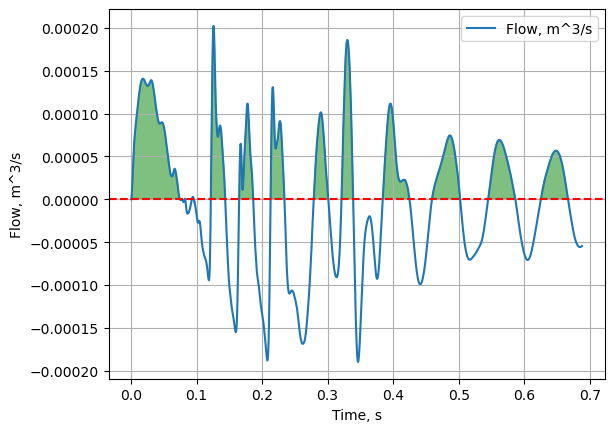

In [73]:
# Plot flow vs time
plt.plot(df['time'], df['flow'], label='Flow, m^3/s')
plt.xlabel('Time, s')
plt.ylabel('Flow, m^3/s')
plt.legend()
plt.grid()
# Draw horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')
# Fill area between where flow is positive and negative
plt.fill_between(df['time'], df['flow'], where=df['flow'] > 0, color='green', alpha=0.5)
plt.show()

In [74]:
# Compute Rimman's sum for d_P.
df['d_P'] = (df.query('flow > 0')['p_vent'] - df.query('flow > 0')['p_aort']) * df.query('flow > 0 and time < 0.26')['timestep']
df.sample(5)

,time,timestep,v_in,v_out,p_vent,p_aort,pv-pa,flow,d_P
2333,0.195024,0.0001,0.000313,0.000415,3805.310,2409.99,1395.320,-0.000102,NaN
1430,0.106600,0.0001,0.000355,0.000393,4573.180,2603.86,1969.320,-0.000039,NaN
3748,0.335633,0.0001,0.000041,-0.000064,-683.748,1719.85,-2403.598,0.000105,NaN
1532,0.116517,0.0001,0.000226,0.000309,5116.850,2624.39,2492.460,-0.000083,NaN
2614,0.223023,0.0001,0.000320,0.000252,3049.140,2223.69,825.450,0.000067,0.082545


In [75]:
# Drop NaN rows from d_P column
df = df.dropna(subset=['d_P'])
df.sample(5)

,time,timestep,v_in,v_out,p_vent,p_aort,pv-pa,flow,d_P
1755,0.138200,0.000100,0.000438,3.659330e-04,3889.83,2638.57,1251.26,7.217300e-05,0.125126
1614,0.124717,0.000100,0.000279,9.579540e-05,4860.46,2635.97,2224.49,1.834306e-04,0.222449
78,0.000460,0.000016,0.000001,4.179270e-07,1187.78,1135.56,52.22,9.789130e-07,0.000827
2659,0.227523,0.000100,0.000318,2.273090e-04,2937.68,2192.17,745.51,9.094400e-05,0.074551
174,0.003274,0.000043,0.000041,-2.461480e-06,1505.01,1149.74,355.27,4.308838e-05,0.015100


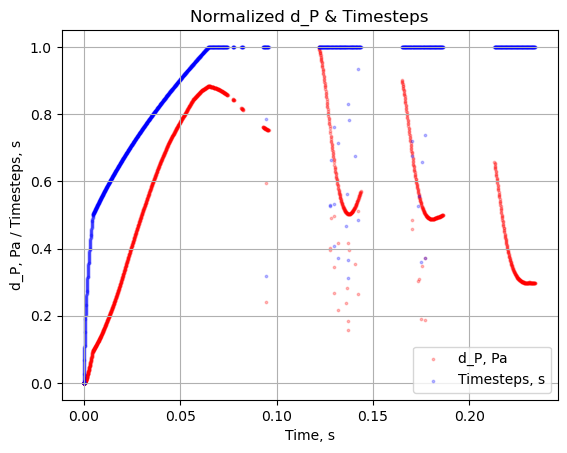

In [76]:
# Scatter plot of Normalized d_P & Timesteps vs Time.
# Plot showing that d_P represent continuous data (function).
# For each timestep one measurement of d_P is taken.
# If timestep is small then d_P is small, due to the fact that d_P is continuos function.

plt.scatter(df['time'], df['d_P']/df['d_P'].max(), label='d_P, Pa', s=3, c='red', marker='o', alpha=0.25)
plt.scatter(df['time'], df['timestep']/df['timestep'].max(), label='Timesteps, s', s=3, c='blue', marker='o', alpha=0.25)
plt.title("Normalized d_P & Timesteps")
plt.xlabel('Time, s')
plt.ylabel('d_P, Pa / Timesteps, s')
plt.legend()
plt.grid()
plt.show()

In [77]:
# Calculate rest of d_P.
d_P = df.query('d_P > 0')['d_P'].sum() / (df.query('flow > 0')['timestep'].sum())
print("d_P = {:.2f} Pa".format(d_P))

d_P = 1506.24 Pa


$$
\Delta P_{mean} = \dfrac{1}{T_{systole}} \int_{T_{systole}} (P_{vent} - P_{aortic}) dt
$$

In [78]:
df.head(3)

,time,timestep,v_in,v_out,p_vent,p_aort,pv-pa,flow,d_P
1,2.000000e-08,1.000000e-08,1.555080e-14,-2.623500e-16,1133.24,1133.24,0.0,1.581315e-14,0.0
2,3.000000e-08,1.000000e-08,7.738420e-14,-8.126770e-16,1133.24,1133.24,0.0,7.819688e-14,0.0
3,4.000000e-08,1.000000e-08,1.440140e-13,-1.585740e-15,1133.24,1133.24,0.0,1.455997e-13,0.0


In [79]:
t1 = 0
t2 = roots[0]

print("t1 = {:.5f} s".format(t1))
print("t2 = {:.5f} s".format(t2))

t1 = 0.00000 s
t2 = 0.26550 s


In [80]:
# From this query we can see take flow and evaluate it's RMS.
df.query('`pv-pa` > 0 and time <= @t2')

,time,timestep,v_in,v_out,p_vent,p_aort,pv-pa,flow,d_P
6,7.000000e-08,1.000000e-08,3.623940e-13,-4.857880e-15,1133.25,1133.24,0.01,3.672519e-13,1.000000e-10
7,8.000000e-08,1.000000e-08,4.510590e-13,-6.127830e-15,1133.25,1133.24,0.01,4.571868e-13,1.000000e-10
8,9.000000e-08,1.000000e-08,5.475050e-13,-7.422690e-15,1133.25,1133.24,0.01,5.549277e-13,1.000000e-10
9,1.000000e-07,1.000000e-08,6.515530e-13,-8.698510e-15,1133.25,1133.24,0.01,6.602515e-13,1.000000e-10
10,1.100000e-07,1.000000e-08,7.631270e-13,-9.917570e-15,1133.25,1133.24,0.01,7.730446e-13,1.000000e-10
...,...,...,...,...,...,...,...,...,...
2720,2.336230e-01,1.000000e-04,2.878480e-04,2.792330e-04,2882.21,2142.50,739.71,8.615000e-06,7.397100e-02
2721,2.337230e-01,1.000000e-04,2.872090e-04,2.805690e-04,2882.48,2141.65,740.83,6.640000e-06,7.408300e-02
2722,2.338230e-01,1.000000e-04,2.865640e-04,2.819240e-04,2880.62,2140.80,739.82,4.640000e-06,7.398200e-02
2723,2.339230e-01,1.000000e-04,2.859230e-04,2.833410e-04,2880.88,2139.95,740.93,2.582000e-06,7.409300e-02


In [81]:
# Importing data.
df_iso = pd.read_excel('./data/testadata_W.xlsx', sheet_name='ISO', header=0)

# Cleaning data.

# Drop 0,1 rows.
df_iso = df_iso.drop([0,1])
# Make all column names lower case
df_iso.columns = df_iso.columns.str.lower()
# In all columns replace all punctuation and spaces with empty string.
df_iso.columns = df_iso.columns.str.replace('[^\w\s]','_')
df_iso.columns = df_iso.columns.str.replace(' ','_')

# Drop all columns except time, flow_rate_adj.
df_iso = df_iso[['time', 'flow_rate_adj']]
df_iso.dropna(inplace=True)
df_iso

C:\TMP\ipykernel_14680\38609569.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_iso.columns = df_iso.columns.str.replace('[^\w\s]','_')


,time,flow_rate_adj
2,0,0
3,0.017951,0
4,0.033128,0
5,0.057339,0
6,0.075552,0
...,...,...
126,1.084945,0
127,1.089334,0
128,1.097563,0
129,1.1025,0


In [82]:
# Convert flow from ml/s to m^3/s
df_iso['flow_rate_adj'] = df_iso['flow_rate_adj'] / 1000

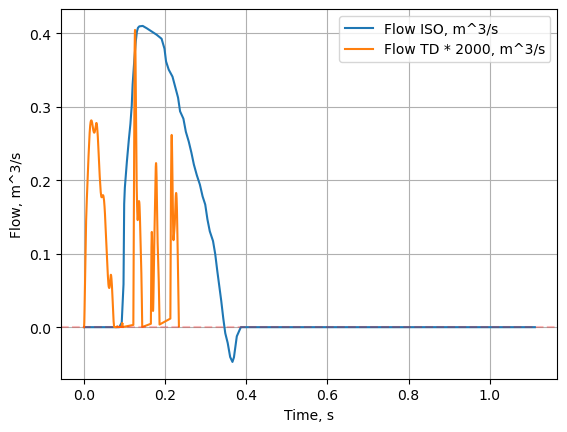

In [83]:
# Plot of flow_rate_adj vs time.
plt.plot(df_iso['time'], df_iso['flow_rate_adj'], label='Flow ISO, m^3/s')
# Plot flow from test data vs time.
plt.plot(df['time'], df['flow']*2000, label='Flow TD * 2000, m^3/s')
plt.xlabel('Time, s')
plt.ylabel('Flow, m^3/s')
plt.legend()
plt.grid()
# Draw horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.25)
plt.show()

<AxesSubplot:title={'center':'Flow rate ISO vs Time'}, xlabel='time', ylabel='flow_rate_adj'>

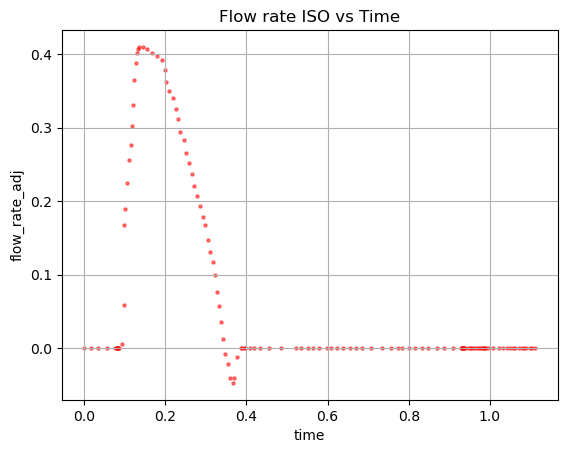

In [84]:
df_iso.plot(x='time', y='flow_rate_adj',\
    kind='scatter', title='Flow rate ISO vs Time', grid=True, s=5, c='red', alpha=0.5)

In [85]:
df_iso_pos = df_iso.query('flow_rate_adj > 0')

$$q_{v_{RMS}} = \sqrt{\dfrac{\int_{t_1}^{t_2}q_v^2(t)dt}{t_2 - t_1}}$$

In [86]:
flow_rms = np.sqrt(
    (df.query('`pv-pa` > 0 and time <= @t2')['flow']**2 * df.query('`pv-pa` > 0 and time <= @t2')['timestep']).sum() / (t2 - t1)
)
print("Flow RMS = {:.6f} m^3/s".format(flow_rms))

Flow RMS = 0.000066 m^3/s


In [87]:
flow_rms_iso = np.sqrt(
    (df_iso_pos['flow_rate_adj']**2 * df_iso_pos['time']).sum() / (df_iso_pos['time'].max() - df_iso_pos['time'].min())
)
print("Flow RMS ISO = {:.6f} m^3/s".format(flow_rms_iso))

Flow RMS ISO = 1.557479 m^3/s


In [88]:
rho = 1060 # kg/m^3

$$
EOA = \dfrac{Q_{RMS}}{51.6\sqrt{\dfrac{\Delta P}{\rho}}}
$$

In [89]:
print("Delta P = {:.2f} Pa".format(d_P))

Delta P = 1506.24 Pa


In [90]:
EOA = flow_rms / (51.6 * (d_P/rho)**0.5) # EOA in m^2
EOA

1.0715315422801787e-06

In [91]:
EOA_ISO = flow_rms_iso / (51.6 * (d_P/rho)**0.5) # EOA in m^2
EOA_ISO

0.025320856479098847

In [92]:
print("EOA = {:.4f} mm^2".format(EOA*10**6))
print("EOA = {:.4f} cm^2".format(EOA*10**4))

EOA = 1.0715 mm^2
EOA = 0.0107 cm^2


In [93]:
print("EOA ISO = {:.4f} mm^2".format(EOA_ISO*10**6))
print("EOA ISO = {:.4f} cm^2".format(EOA_ISO*10**4))

EOA ISO = 25320.8565 mm^2
EOA ISO = 253.2086 cm^2
